In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

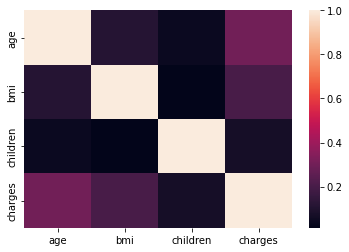

In [7]:
sns.heatmap(data.corr())

In [8]:
X = data["bmi"]
y = data["charges"]

In [9]:
X = X.values.reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [11]:
# lm model 
lmReg = LinearRegression(fit_intercept=True)

In [12]:
lmReg.fit(X_train, y_train)

LinearRegression()

In [13]:
lmReg.intercept_

1804.254108572566

In [14]:
lmReg.coef_

array([373.08714022])

In [15]:
# test
predictions = lmReg.predict(X_test)

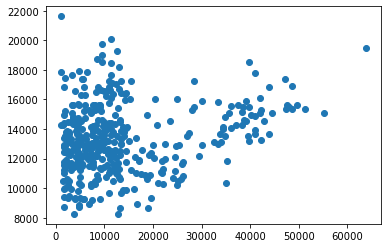

In [16]:
plt.scatter(y_test, predictions)

In [17]:
mean_squared_error(y_test, predictions)

138831274.5624309

In [18]:
r2_score(y_test, predictions)

0.04976521074908136

In [19]:
lmReg.score(X_test, y_test)

0.04976521074908136

In [20]:
train_r= round(lmReg.score(X_train, y_train), 2)
test_r = round(lmReg.score(X_test, y_test), 2)
print(f'R^2 Value for Training Data: {train_r}')
print(f'R^2 Value for Test Data: {test_r}')

R^2 Value for Training Data: 0.03
R^2 Value for Test Data: 0.05


In [21]:
print('R2: ' + str(lmReg.score(X_test, y_test)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2: 0.04976521074908136
MAE: 9024.202482577517
MSE: 138831274.5624309
RMSE: 11782.668397372086


Text(0, 0.5, 'Insurance')

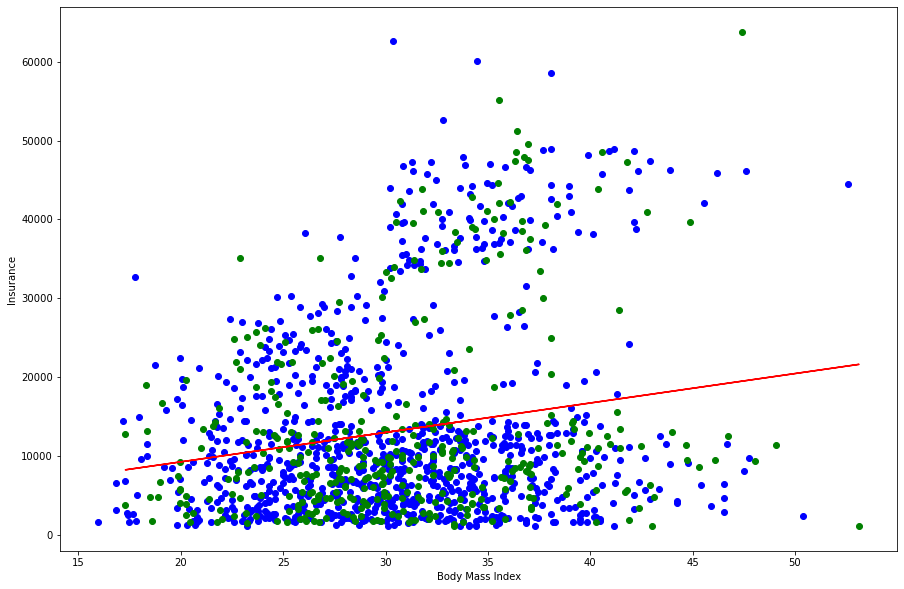

In [22]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, predictions, color="red")
plt.xlabel("Body Mass Index")
plt.ylabel("Insurance")